In [2]:
import hashlib
import struct
import jupyter
from matplotlib import pyplot as plt
import statistics

In [3]:
def gen_data(number_of_lists: int):
    res = []
    counter = 0
    for i in range(1, number_of_lists + 1):
        res.append([])
        for j in range(i):
            counter += 1
            res[i - 1].append(counter)
    return res

In [4]:
def min_count(array, hash_func, k: int):
    M = [1 for _ in range(k)]
    for elem in array:
        hashed_elem = hash_func(elem)
        if hashed_elem < M[k - 1] and hashed_elem not in M:
            M[k - 1] = hashed_elem
            M.sort()
    if M[k - 1] == 1:
        return len(list(filter(lambda x: x != 1, M)))
    else:
        return (k - 1) / M[k - 1]

In [5]:
def hash_1(x):
    [number] = struct.unpack("<I", hashlib.md5(x.__str__().encode()).digest()[:4])
    return number / float(0xFFFFFFFF)

In [6]:
def hash_3(x):
    [number] = struct.unpack("<B", hashlib.md5(x.__str__().encode()).digest()[:1])
    return number / float(0xFF)

In [7]:
def hash_2(x):
    [number] = struct.unpack("<H", hashlib.md5(x.__str__().encode()).digest()[:2])
    return number / float(0xFFFF)

In [8]:
def hash_4(x):
    [number] = struct.unpack("<Q", hashlib.md5(x.__str__().encode()).digest()[:8])
    return number / float(0xFFFFFFFFFFFFFFFF)

In [9]:
def ex_5b_data():
    data = gen_data(10 ** 4)
    k_set = [2, 3, 10, 100, 400]
    result = {}
    for k in k_set:
        print(k)
        data_plot = []
        for x in data:
            data_plot.append((len(x), min_count(x, hash_1, k) / len(x)))
        result[k] = data_plot
        
    return result

ex_5_data = ex_5b_data()

2
3
10
100
400


In [10]:
ex_5_data

{2: [(1, 1.0),
  (2, 0.9049403806410072),
  (3, 0.6996664030023391),
  (4, 0.6137973074657885),
  (5, 0.7558471649028258),
  (6, 5.191520348806682),
  (7, 2.241979067757292),
  (8, 0.9899199026129345),
  (9, 0.29737215603016576),
  (10, 1.1351812138855006),
  (11, 0.8257124416257856),
  (12, 1.0321186035373078),
  (13, 0.3223294282812732),
  (14, 0.37375210557527877),
  (15, 0.4097604136802436),
  (16, 0.5445460775542491),
  (17, 0.3011323001100218),
  (18, 0.653824585550455),
  (19, 0.8989495720635814),
  (20, 0.3483454751080291),
  (21, 0.8156742083403339),
  (22, 1.4548197306307218),
  (23, 0.7662479769906987),
  (24, 0.6477550573736783),
  (25, 18.888658077062793),
  (26, 0.35661729266112724),
  (27, 0.5857861911728959),
  (28, 0.457282649843442),
  (29, 0.5021224240497364),
  (30, 0.6179172878365268),
  (31, 0.23471636491232797),
  (32, 2.562372068349597),
  (33, 0.6923769150629951),
  (34, 1.3427411974218872),
  (35, 1.0395565611014919),
  (36, 3.9131202757869366),
  (37, 0.31744

2
3
10
100
400


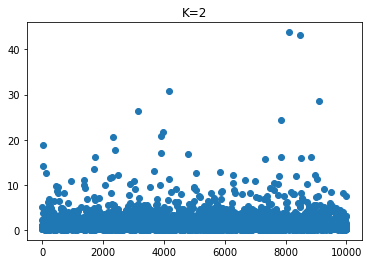

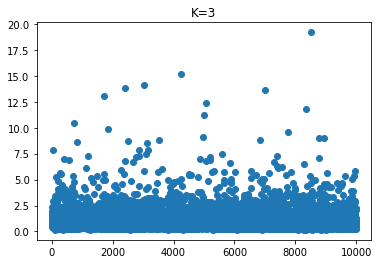

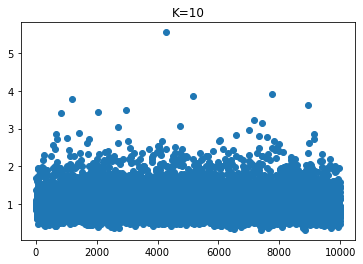

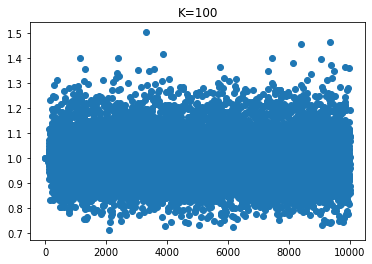

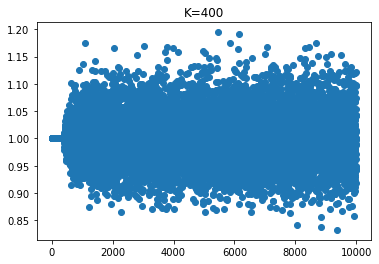

In [11]:
def ex_5b_plot():
    for k, data in ex_5_data.items():
        print(k)
        plt.figure(k)
        plt.title(f'K={k}')
        plt.scatter([i[0] for i in data], [i[1] for i in data])
    plt.show()

ex_5b_plot()

### HYPER LOG

In [13]:
import math
import numpy as np
from hashlib import *


def firstOne(string):
    for c, i in zip(string, range(0, len(string))):
        if c == '1':
            return i + 1
    return 0

In [48]:
def g(bin_string):
    if bin_string.find("1") < 0:
        return len(bin_string) + 1
    return bin_string.index("1") + 1


def getAlpha(m):
    if m == 16:
        return 0.673
    if m == 32:
        return 0.697
    if m == 64:
        return 0.709
    return 0.7213 / (1 + 1.079 / m)


def hyper_log_log(set, b, h):
    m = 2 ** b
    registers = np.zeros(m)
    for v in set:
        allBits = firstBits(h, v)
        j = int(allBits[0:b], 2)
        w = allBits[b:]
        registers[j] = max(registers[j], g(w))

    E = getAlpha(m) * (m ** 2) * ((np.sum(np.power(2, -registers))) ** (-1))
    
    print("E =", E, (2 ** 32) / 30, "Regs = ", sum(registers == 0))
    if E <= (5 / 2 * m):
        V = sum(registers == 0)
        if V != 0:
            E = -m * math.log(V / m)
    if E > (2 ** 32) / 30:
        H_c = 2 ** 32
        E = - H_c * np.log((H_c - E) / H_c)

    return E


def firstBits(hash_function, string):
    string = hash_function(str(string).encode('utf-8')).hexdigest()
    return bin(int(string, 16))[-32:]

In [49]:
firstBits(sha256, 123)
# d = []
# for e in range(10000):
#     d.append(e)

# hyper_log_log(d, 10, sha256)

'11110111101000100111101011100011'

In [25]:
def ex_8_data(n, b, h):
    
    data = gen_data(n)
    results = []
    for data_set in data:
        count = hyper_log_log(data_set, b, h)
        results.append((len(data_set), count / len(data_set)))
    return results

ex_8 = ex_8_data(10**4, 10, sha256)


10110111100001110101101101001011
738.5098624945133
E= 738.5098624945133 V= 1023
11101100000100111010101100110101
00101001101101001001111111001110
738.7355132713693
E= 738.7355132713693 V= 1022
10101100110110101011111110001010
01100100101011111110001110011101
11110000100100011001011010000011
739.2776381587994
E= 739.2776381587994 V= 1021
00001000000110110010010001010001
11011110111110110110010010100011
00000001011110111011010110110111
11100110101011110001110111010101
739.4585233161664
E= 739.4585233161664 V= 1020
00001010000001011110111010111000
10101100101110111010100100011000
11100101100000011110001001111000
01110101111110011001111001100001
01100001011111011000101111011011
740.307603789071
E= 740.307603789071 V= 1019
11110100110011101000110011011001
00111011111001101011100111100011
11000101111111101101000101001010
01001100101001111111011101100111
10100010110110010010000000101011
11111011110110001111010001000011
740.6364378858405
E= 740.6364378858405 V= 1018
110000000101110111011101000

01000011101100001000001111111100
10011111000011100110101000111010
01100000111011111111000001010100
10100000101110101000100101110011
00000010010000001110011100111000
11000011111011110110100010001111
10011000110100110111011000110110
10001110110100110001110000101010
00101000011101101100111110001100
00101110000101100011010011101000
11101101111110000011000101000001
01001100110111110000111101010010
00001101010101111111110011101100
11011111111111000111010010101100
01000110101000111000100011110011
01110011111001110000001101100000
10110000111001111010011100010011
00011010001111000101100101101011
10010110111001100000001001010010
01000011010011001001011000111110
00010110110110011100000101000010
10000111010101010010001101110000
01100100110001010011001010101110
01101101110011110011100100111011
11111011111000101111000010111000
00101101010000101111011011001111
00010101110100101111000011010010
01100110111000100100100010001100
00010111001101110000110100111110
11000001011111100110010110111001
0110111101

11110100001101000000111010000111
10100100101010010000100010111100
11100111000100110111001001100100
00000010000010110001010110010011
01000100010101010001110101111111
00111011100101111010000101011111
00000001001111001110010111000011
00101100101010100100010010000011
11000100010011001011110011010000
11000010111010100011110010110101
10100001010000000011110011000000
01011010000000010001111110100110
01011011111111101110000111000110
11001010011010100001111010000111
01111001100100110001101100010100
01001000010110010001111110101100
01111101001100100110000100000001
11000000110101011111001101110100
00110001101101100010010100111101
10100010000010110001011100110110
10000100001011101001101011001100
00110110011110100110111011011100
11011111100111001010000100000110
01110111111000010110100000011100
00010110000001111110111101011111
00110001011111001010001110010111
00100100001011011001101000110010
00011011011001100000010110101011
782.1706860994644
E= 782.1706860994644 V= 938
100100101100010011010100001010

11001010000110111011110011010110
11100101100110000111000100001110
01001010001011011110110100000110
10010101100010101001011110010000
01001110101110001100111111101010
01011110010000100001000000110100
01100100000101010011000010010000
793.5231424696454
E= 793.5231424696454 V= 918
00111110001101111111100100000100
00101100101110000000100000011101
11111101000101111011010011100110
10101110110001111101000000100010
01010110110110011011111100011001
10011101101001100100100001010101
01010110110011001011001110000011
10000001100110001111101101111100
10001010000110010001010101010001
00001100011010001110010100001110
11111000000110110001111110000110
01001000101101000011110001101011
01001100110001010000111111111100
01000101100100010111100001110000
00010110100001011010110001001001
01000101011010011111010110101110
00001110000101110011101001110111
10100111010011001100110000010110
01011101010101111111111111011111
01000001010101000101101000001110
01100010110100100100000100110000
001110111101111111101100100111

11111101010111010101010110011111
01111111010101111000110011000011
10000000010110011110100001100001
00101101001100011101110000011111
00010000011000111010010000100100
11000010110110111010000111000001
10010010100111001000001111011000
10100000000100011111011101101110
01111111101111001110101011111101
01101100000000100101000001011011
10101111101010100101100010100010
00110111111110101110001110010110
10011011011110101100111001010011
10100111111010100111110001010000
00010111000010111011001000000001
11100001000001111000100111110001
01111000100010100010001111001111
01010001100001011001000001110001
01100100010001110111111111110101
10110101101001100000011110011111
11110001110011010011100010111101
10100111110011000110011111101010
01010011011101101101101001110101
00110100100110000001101011010111
00111010010000000000001100001110
11110011011001101101110000010101
11110010100100111111110001001110
11010001010001101010110110101100
01010010000011000010001111101100
10001011111010101001001100100000
0010110010

00111001101111010010000101001100
00101010001110100000101011011001
01000110100010000111010000110010
00101100010111011110001011011010
10000111010111100000011010111010
10011100011000010001000100011100
10111000000110011101010011010111
10100101111000100011111101001010
10010100011101110110000000101000
00011100010000110011001110110001
11110110010000111011010011111001
11101110011011010011100111100010
10101111101011010011001001100111
10000011011001010111101000001100
11000100010111000110111111001010
10110000000111001001110010110001
00111100001001111010111101011100
10100011010000100111111010001001
10111010100100010011100011011001
01110110011011000000100011011101
00011110010010010000011110100110
11001001101011010101010101010111
01111001011010011111000110110100
01000010001011100100001010001100
11011000110001111001110001110000
00101100010011010101111101101101
11010101001001011100010101111001
10001001111000001101010010010111
00110011001000101100001100011010
01011011101001110000010111001011
0011001000

01100010010000010010110001111101
11000110010111000110110010010000
11001101110011001011111000110100
00000110011010111110101101010000
00111011111011010011000001101000
00010100011111110110110010101010
00100110010101001000001110110011
10100100010011000111100000000110
00011011001001011110011110110000
10110000001110100010010101001001
01110010001111101000111000110111
10101011110001011111101111100100
01000000000010100110111101010000
00010110101011110101000110111100
11000010111011010101001011101111
11100100111000101111111011101001
01000000011010110100100010011111
10111010010011111001100111001000
10100111000001100111100001110111
11000101110101101010100010101101
11111011010000001100111011011011
11011101111111100100001001000011
01011001111010011001001000000110
01011110111111011100110011011100
00101000000011101010010011111110
10100111101000011010011011010111
11101100010100001010101000011111
11011110101001010000111000011100
10000111110000111001010000110011
01110111001111101010100100101110
0000100011

00010000100111111011000010100100
01011110010111011011000100001111
01101100100111100011110010111100
10100001111111101010000101000000
11110100100110101111001101111110
10101000010101111100101110011001
11011111111110111000000010110001
00010001111110110011010110100001
00001111010101111110010000110011
00100001100110111001011001000111
00010100010001100010110011100100
11111001111001000010000110100101
10110011011000101001011010110100
00110100000011011000001011101010
10100000001000100111001101111010
00110000001111101001110010010110
10000110101001111111100101111110
10110000011110011011101101010110
10000111100110001000111111110101
11110011001111010100111100110011
00010110001010100010101010101011
10110110100001100100111001010001
01111101110111001010111111100000
00001100110101101011111101000010
00000111000100110001010010000000
00011000111100100110111010111001
11100000001111000101101101111100
01110111010001010111011010000011
01000110110000000101001110000100
11110001110101111110110011110000
1110100010

01010001010110110010010001000110
10100000000110011001000010101011
00011011101111110111111101001100
10100111100000101010111011001010
01101101110001001001101100011000
00010010111111010101100011010010
00111001000100111010011000100101
00110111010000000010001001010100
10001001000010101111101000110110
10100000001101001101111000000110
10000001110000111110100001111101
10000100010111010010111111011101
00011000110101000001001000110001
10010001011000100100011111011111
01000001111010100001010001011001
11010101111101000000001110111100
01100000101111001000110110111101
01101011011010001101001011000011
01011111111110100111000111110010
00000100100000111011100010110000
01000001011100110001111100010011
10101111100000111000010001001111
01111101100010010110010101100100
10010101110000111101010111111100
01111011100100101000001011010111
10011010111000111000101000001100
01000001000111001010111011011011
00011100111111101101111010101000
00100110001101100011010001011101
11000001100011100101100000011010
1100010000

11110101000100000110101111100111
01101011110001100110111001101100
00000000000010001101000100100010
01110100011100100001000011001001
01100101110011001010010010100110
01011010101110110001001110011000
01101110110000111101010101100000
01111110101000111001111000010011
00011101000100000010100111001011
01111101011101111100010101010011
00001100011011011111010001101110
01100111101101011111111011110100
01110011110101011011101001010001
01111111111001101100100001100000
01011111001100010001010011110000
01001001110000011101100110101110
01000000111100101010100100101010
10100101100100000010001000010000
01110100010100010000110101000000
10010001001110110011101100010001
10000111011010111100010000001100
11010010000111000010110001111110
00000111111100111101011010101100
01101101110111001011001001001000
10110001110101001110010111111110
10110110110011010011100000101001
11001101100010010010000010111011
11010101101101011001000011001101
10000110101101101111101111110000
10011111001000101110100111100100
1000010010

01111001111010110110110101001011
01011000000101100101001101001010
01001101011011011101001100111110
00011100100000101010011100100111
00001011100101101001011000110101
11000100111011010001110010110100
11100000000110001100000010100001
10010110101100000100011111000010
01000010000001111111100011110100
854.6276422653531
E= 854.6276422653531 V= 820
11000100111111110010100010101100
10000010101011100101001010100011
01011101111110100100110101011111
11111000111101000111100100100100
10101101111110101001010001010011
00000000101110110110100010100011
01101001101111110010010010001010
01111101011100111000100100011011
01001000100101100001101000110101
11110110010110100000111110011010
11010000110000101011111111110010
11100111110111010111011111000101
10100010000001010100010100011101
11011010101111010000100101110010
11000100011000011100101000111011
01010001010000011110000101100000
00001000101010111110011110000011
01110010101000101011111010001011
01010100011101011010000011000001
111101011011110011111010110000

10100000101011010101101000001101
10010000000010010010101110100110
01100010101100101101000110001000
01111110011010110010111010101111
00000110001011111110010111001110
00001011100111110000001100110011
01010010000101110111111111001001
00011101010101011100001000011111
11101010111110001000011010110111
01110010110011000000001101011001
11011000000010111010011001111101
11100111001100101110111000010110
00101101000111010000101101100011
00111100000100011100100111101011
10011110010111111010010000001010
11001101111001100010001011011001
00110110001101111100111111101110
00100110010110000010110100110110
10010101010011110101110001000111
01000000100110111111010010101000
01111111001001011000011110011010
11111000011000100111110001100100
00000111001111111101110110000101
10111001000010111110011100001100
11101100101100010000011110111010
01010011100100111100011011100101
11001001111001001010000010100110
10000000011000000100011000101111
00010010111111111010001110000001
01111110111011100011001100010101
1000100010

10111010010100011011100010111111
11101000111100010010111011101110
11001100101100001011000101011101
00001001010001100000100100011011
10010110001110001011001010100100
00010101110001101110101010011100
11010011110111111111001100111101
01010111110100000000100111101111
00101001101001111000000101001010
11101000100010111000011110111010
10100010000001010011111001101100
00000111010000011010100001100101
00100000011010110001010101101101
10111100000000010000101011101100
00111011001000001110100000010000
00111111110011011011100000110010
00110001111100100001100000101111
00001111101000111011100010000010
10011110111011100000001000110111
00001011000101010010100011011010
11001010010110010011010101111000
10101010011000001110100010100000
10001111111101010100111110110001
01111110111001100010100111000001
11111000110011101000110001010011
00000011011111000100000010101001
01111011000101111000010110000101
01011110100111000011110111001111
11110110101001111001000010100011
10010011111000111011101111110011
1011110111

01111111110101111010101100011001
10001001111011111111001010001100
11011011100011011101111110001011
10001110010111001111110001001101
01110001110111110000010010111111
10001100111010000011000111101110
00000010010011010000111011010011
10100100000001001011110110010000
10111000100110110101111101001000
10001110101011110011110101000111
00100000100110011101000111100010
01001100010110100110111010010111
10101010001001001010110110111000
01110001001011101000011111111100
01011101100110010110110101011100
01101110110100110011110011110011
10110000111010111010111101100011
11010011001101001001101011101101
01010000010110010101101011010011
00001110001100010111110001111010
10100010010011111001110110101110
00101100111001000010011011101000
00000110101101001101110010100110
00011101100101010001111100110100
11011010101011010010101110010100
01000101111000110100011001010000
00101010001010011111001001011111
01111110000010111011111111111100
01001111001100010110100010011001
10010001010000011100110101001100
1101011101

E= 877.9716322124679 V= 777
00001101111100000011111110101100
11110011010001011001011111001011
11011000011101011000111001001011
11101101000010001100110010011010
00101001101001110101110100011111
11101001001100011010101011100111
11110000101010010011101001011100
00110001011100011111001111100000
10011110111101001101100001101111
00101011100010010101101011110111
10011011011011100111000110111010
01011001000100010010101111010101
11001100011011110110110000010110
01011001111110110011100001111000
11101000010101100000111010010000
00011110011001110001011101000111
10100100001110100010000010110101
11100001110011010010000111100110
01100110101100011111111000001110
00101100011101010000110100111100
11011011000001001100111100101111
01000100010111010101000111010110
01010001000101100110110111000111
01101011110011000110010000101011
10010000101011011011010111101010
10110000111110100101110101001011
10000010000110101011111101100110
11111011101011000100011101101000
11010101111001111001111110001000
001111010000010

00100101000111111011110000011011
00111101111001010011001110111001
10010000010010100111000110100110
00100001100010101011001100100110
01001000010111011000110100100001
00101100000000001011101010110001
11101000011001100000100010000110
00110011001001101010011000110011
01111010100110111100011110000010
00011111010011101101010100011010
10100110101010000011111001011001
10010011011001000110001000011000
10100000110110100011000000011101
11011110001110001111111010000010
10111101100101110100011010000100
10101000001101000111010001101101
11101000001100111100011110100110
01010000010101101111100000111101
01011000010011101110011110111001
10001000101111111011001000000001
01111000000111101100011010110001
10011011001110111010000000001101
00101111000010000010001001010001
11001010001010000101110110000101
10100010011010110011000001000100
00111001010111011000011110100011
10000001001110101011100100000001
11101110000000101110000110111101
10000001100111001101101110111011
01001000001100001101011010010001
0000010101

10010101110101001100101010011100
01010100000011101110100011101000
00011101100001110101110110000000
10010111011111100100110010110001
10001111110011101011101101100101
00000111100111010101100110110111
01011011010101111111001110001011
11011100010101100101110100001100
11011101110100000110100100111101
01010111010000101111101101110010
11110101101101111010101000110110
01011101001101001000110110110100
01111100111000011101010001001001
01111111011011101010101010101110
00110111010111000001011011000001
11101101000010001011100111100000
01100010010111010101111011111100
01111000110011111100101000110001
00000010101111100101010011101000
11110110110110111111110111010010
10011100000000111110100010001010
11011000010010011110011000111011
11000011111011001111010110110000
11001011110101001001000111101100
10111011101100000010100010110101
11001011000100001011011011001101
11101100100110000011000100100001
11010101000101011101010000011110
10000100000101111011100010001011
11100100110010100101111001100001
1001111001

00001001111010010100110110011111
10100100010111010110000001110011
00111111111100010001111101011011
01100101110111000111010010101110
00001100011100111001011000101100
01010000101110011011100101010101
11100011111011000101011010000111
00100100100100001001110011000000
01010101100100001010101111000110
11010011100100101010010011101001
10101001101000101110110000011111
00010000110000010001000100111000
10000001111110010110010101000011
00000011100000010000000001000010
00000111101010100101011110011000
11110001101111001010101000110110
10101111111000010101011011000101
00000111001000111110100111101110
11000100011100010000011101011110
01110110010010011111001101101101
11100111011101111100100110110010
10100001010000110010101011111100
10010101101100000100100011100010
00000011001101101011000100010001
11111111010101110101100100001011
00110000000100100110010001010010
00010100011010010011011110011101
00110101011011101011010001101000
01010011101001001001100011000000
10101000011010011000010100100011
1011111001

11011001001011010000110011010000
01111000111000101110100100001101
00001101011110000100011001111010
00100011101100100010011001011001
10100111111110011100101111001110
00111101001000110110110000000100
10100000100010011101000000101101
00101011111110100101101011011011
00111110101010010011011001011110
00111011111110101011011100111000
11111000000110000011101111111110
00110111010011110110110100010110
10010001100000000101111000001111
11000000100100110001001110011000
11110111000110110100101001101011
11111101010000001000111000000011
11101001000010100100101011010000
00001000010011110100001010110101
01010101110011101011001001100000
00110100010101100101000101000110
10110101111101101110111100011101
01001000000111010111111011111000
11100110010101111011000011001011
01001010101111101011111001100111
00110001101011110001110010111101
10101101110000110101111001101111
10000001001001110011001110000100
10011111000100101101001010110001
11001010010100010100001110110101
01000010001001000110010011010101
1101111010

01110000110100001101001000111000
01110011110011010011000010110010
10101001000011101011101110110101
10100000001100100100111110111101
11110010000101000000010010101100
11110000110010011010011111100010
00100000110000101101101101011101
11011110011100101001111001100000
10111011000110011101110001000010
00100000011111001111011101000001
01110100000101010011101011010000
01100011011100111110000010011000
11100111111101111000001011000011
00000000000110011000010011100110
10101010110100110100010111101100
10000010001101001101100000101001
00010110001101000100001110100011
00010001001101010000010001011000
00011011000101010111110100101110
10001001011101100000110000011000
01001111100111110111101011100100
11001111110111011101000100111100
11001010010100010010110001110011
11001000011110110000110111010110
01000111110110011100001101100100
00001001101001010010100110110000
00101001001011001011010101010011
11010100010110100001010011100011
11110110101111000111101110001100
01010011101011110101000100111001
1000100110

10001110010110101000110000110110
10011001001000111111000111100011
11101101110010001110011010100000
01000011011001111010110011001100
01101011000111100101001100010001
11000111101011110100001010000000
01011001011010110001001000001011
11100110111001111001100011101111
10001010100100100010000100111011
00110011001111011101000001101111
10000000111000111010011110010000
01011110100110000101101011101100
11101010000101011010001000110000
10101010011001010101111111011101
00111001100000011001010101110100
01001110011110011101101010000111
10101010010101000100101100110001
11111011111010001101011100110011
00010101111000010001001011111110
11010011000101110011111110000000
10110011111001011110010101001110
10011111011110010111001010100111
01100000111101000100100001011100
00110001100101110100000110011110
01010011001000000101110001000011
01011000110011111100011100100110
00010000100110111010100111010111
11001101101000011000110110100000
01110110011010001111100001000001
01010000000111011010000101000011
1000111100

00101110100011111101010010111000
01010100110110010101011110111111
10011011111111000011000110011110
11110110011001101010001000010000
10000110110000000111001111010110
10001011100111101000101010110011
11010100110100010110010011101000
00111010101001101100110101101001
11101111110110001111011101110010
11110011101010011010100101010111
01000000100100100101010110010111
01100001000111101110110011100011
01111101111010100111011000000101
11010110010010111000011111010111
00010100111011111101101010011011
11000101100111101011110100101011
11110011100011011001001010101010
11111010111001010110111000101111
11011110100010000000001111111010
01110100101100000110010111101010
11110101001101011100111100110111
00100111100000001101100010010000
01111001001010110110010101100011
00111000100111111110000101001110
11011001110001011000000101100010
10101110101110110000111101010110
01100100111111010110111011000000
11011100010100001000010010000100
01000001101001101001101110101100
01101001001111101100010001100101
0010111000

01100010110100111111101100000111
00011001100110100110110111011001
00100111000001101111110010001111
01000110010100000010001000011110
11001000101001111100100111001011
01110011101101011100100010010101
11100000111111000001111001010110
10010101000100001100101011110011
00010001010000000110101101111100
00101110000110000001101000011101
11000101000101011101111001101001
10011110110010011001011101000101
11100111011000101011100011101111
11110100100100011110100001000010
11000101001000011000101000110010
01101010000001010001010110011001
11000101100111010111011101000110
00100110110000011010010101100110
00011110011101101000101011011110
00110011010111100011111010010111
10110101111010111001010110000011
00000010111011110100110011001011
10111010001010010001011100001100
01011100011010010101000011110011
10111011000111010100010110000111
11110101001110100011010011010001
00100110001110101110110001110101
10110111100001100111001111110100
11100100101110110001011000111001
01001111010100011011111101000110
0111011001

10010111111111010101001010001101
10110110001100111011011110000101
11110000000100101101010100001011
00000000011010110001001011101011
10011011000110000011001011011111
01011100111010011111100111011001
00001101100001001000011011111101
01110010111101110100000010001011
11100001000100111001110110001101
10000001100010001001110000100101
01011100001010100001000111000001
01100011010110000101011001101001
00101000111111001110010010111100
11101000011101110011011011001001
11001001010110111000111111111000
01101011101011011000011010100111
11100010110010001111000010000110
01111010011101101011101001111111
01100000001100010100111101000111
01010010000000110000111010100110
11001101101100100010001010111010
11001010000110110011010010011000
11101110101000011011111100011001
01100000101111101000010000000111
10001100011111001100111111010010
01000111111101111100100010001001
10111000111101010100010000011111
11010000110000001000000100000001
01110001001010110011010101010111
11010100001011110001001110101101
0010101011

11101001011010101101010000101101
10011110000010101000000101111011
00010001011111101101101111000000
00101001011011001010110001011110
10101010110100110001000101000101
10011001101111110101000101101111
11110011111000000111001010110111
11110101010011110111110010001010
00110000010010110110100111101000
01101101011011011101101000111001
10000011010010110011100010110000
11101100100010110100101110100010
01000110111101101111100101001111
10001100101101011010101101000101
10100000011011011110110010110010
11101000101101001011011001011100
10010101111010111000110111111111
10111011110101110001001111100111
10100110001001001100110011100001
00001000100001010101011001110000
01100110000000101111000001111001
01110000011000110111111010111111
01100011010010111011100001101101
01000001110101000011110010111100
10111100000100100001101001000100
00001000100111001001111010110011
01000100111011001000111000010011
01011001101111011010010100000110
00001111100001100100100111100101
01001100011011000110001111001000
0101001011

11000101001111001010111001001010
11001111000011011100100100010101
01001110100000101111011110101011
10100001001111001000100110000111
11000110101001000101110010000100
00000000111100100010000000001011
00101100011110010110100011111011
10101111110111100111101011100100
11000000111011110100110100101001
11011001001100011001000010011101
10101010000100111011010101110100
01110110001110110110001101010010
01101110010101110111110011011011
11011011010110011101011101000010
11110010010100011010110101100001
00011000010001101011100001001010
10101000000011001010010011010111
01000000000010111111011110111100
01010111000000011101101011010001
01011010000111001110000010101111
11101011011010100010110001101111
11001111010110110101011111010111
10100010010110100000010110101100
01010010111011110100111010011111
00110100100110110000011000010010
00011101011010001111001111010010
00001110000001001101001101011010
11000101011001011101101000010010
00001100011100000001001100101001
00001001011101001100000000000011
0000110010

01010001100001110101010010001000
01010000110000100001101010011011
10000100011101101110011011110001
01011110010101001010111011011101
00000011111010111110111101100110
01010010100111010001010100010111
10001110011011010000000100100001
00001011011010000101101111011110
10110110000111100100110010000111
01000001000101100110101010110000
01001100010010010110000110010110
00001100100011011000010100010001
11010011010010100011111000101101
10101101010011001110010111100011
01110111001111110011000101100000
11101100101010001000100101011001
11010101101111010100110010001000
01101011110010001100110110000111
00100000110001011100001011110110
11010001101100000001000101001011
00100100110100100100110010111100
00101110011100101010011100111101
10110001000011110011011011101010
00001111110110100111110111111011
00111110011011011001110010010110
01011001000010000000011111101100
11101000010011110100011101101100
01110000010000011011000101101111
11001011101101111010010011111110
01111010010011010111011110001001
0100101011

10010110010000010100100000111010
01100010010110100111001010101111
01100001001111010001110001010011
01001100101111000111001010110101
01001100110000011110000100110010
00011010110100100111110010110111
10101010001100000010000101001100
00101111001100111001111001101011
01010000100110110010101111100101
10000101010100111111010100000000
10010100110001101101111010000001
00011101010101000001100001001011
10100101110001000100000010101101
11001011110001001110001110010011
01000111011111010011110011111001
11011011101111010010011110111011
11011001101010110001111011110111
10110101110100001010001100111110
01000011001100001001101001001011
00100011111011001111010001001110
10100001011111101100000111111110
11000100111100111001010100111110
00100111101111010001111000110010
00011001000001011001010111010101
01111110001110101111011010100101
11010001010010110000000010000011
00101001001110101101110111110110
11011010000111101100010001010000
01101101011001010111001101011000
01111101100110101111101110001111
1000101000

11010111100110101100101110001000
11010000110111011100011110100100
10000011101011101010110010001100
11010111111011011100100010101110
10110011010100000000011101001101
10111100000101100100100001010010
01010011111000011001111001011011
11101000110110101001001011100001
11110000111110010011110101011110
01111010011101101001000000101101
00000001111000001110101101000011
11100101111000011011111010000101
10110011011000010000111111010000
10001001000011000110000010101101
10010111011101110000110000111011
11001100111001000011110100001101
00100100100011100100001110101011
00110011111111010011010100001100
01001011011110110001100100010011
01101111000101110110000100111000
11111011010010000000100000100010
11010101111001111001000111010010
10111110111000101111100001111101
11010010100110101001000000000001
10100111111011001011001011001110
11011100011010111001011001100001
11111101110010000111010010000110
11010100011100010011111110011011
11010000011100001101101110000110
11111100111101100110000110110000
0000011101

11000001110111100111000111101011
00110001100111010010101001111011
10001100100001110100000000111000
01010000110010000000111100100010
00110011000110111110110100010100
01110010111110001010100011001010
10000101110101110110111110100000
11110011010010001010000011101000
10110101000111111000111001011100
11010111110010010100010101000111
11000001100010111111100110011001
11011010110101111111110000001001
11011101000010000001101111110001
01111111001100000001000100110000
11111000001010100101010111010100
11111011001111011101101111111111
11101000100000100000011001001011
00011100000110001010010011111000
01101101110101001000111101000101
10100100110001101001100000010111
01101000011000110011000001101011
00010111011110101111101000011001
10001000010011101001010011101001
10110011110011111011011101001001
11111110111010011100010110001011
10000101000000001100001110101010
10001110101111110111111000011111
01000001000011111100010011000100
01100110001000010100000011101100
11110111010010011010011101010110
0001101110

01010001001001100001000010110100
01101000000011110100011101001100
01100101101111001110001010011101
10111100011000100001000111101101
11000100110100000100100111101001
01001111101000110000100001000010
11101011010001101110110101010110
10100010010001011010010101000001
01001101110000011110111100000010
10000010111011110100011011011011
10111111100000110010111101010000
01100010101101111110000001000001
11001010100111010101001100101110
00110111011110110010100010101001
00000010101011011001111101101011
10010100000110110110111000010111
01010101011000011011001010010111
10110101110000110010001111110100
11101001100000001111000010100000
11010000010100110011001111110001
10101001100111011100000001101100
10010010110001001111111011000110
00110100010001011101001001100001
00111111010011010110100010000100
10111011001001011001101011101110
11100101001011001001111101010001
10011001111000110000010111001001
00010100010101010001001011101010
10101100000101110101011110100001
11101111111011101111001100011111
1001100100

11011010001010000000111111111101
00110110111111101110101111011001
10000001010101100100110100101011
01101101011001101111100101011101
11010000111101110001000100111111
01001101111101001001100100000011
01011011011110110000101111011100
01110011000110000101000000001010
10111110011000011100000011011100
00001100001110101001101000000100
01100100101001010010001001000010
11011111001101001100010011100110
00100011111110001000110011110110
10110100100010000001101001011011
10110010010011111100101110011000
00011000101111101011111101111111
00101100111010101001001010011001
00000010001101010001101110011011
11101101001010110100100100101101
10110000111110111011011101100101
01111010010001011101100010111110
11010110011001110100101111100101
01110111001110111000100010001111
11010101000000010000111000101111
11010101000110000100001101100110
01100100100100111100011000011001
11111110101000010011100101111110
11000001101000111111000100001110
11010001001100010001101001011111
01000110000010111001011111000111
0001010111

10110111011111010111000110100110
11001001110011001110010111110110
01001000011101010011011010001110
10000101010011100000010101001011
00100001000010010001011001001010
01001100011000001110101000101101
10100100100110000000110111101101
01100011000100100111110010000010
00011100000010011011001110111100
11010001111101101000111100101001
10101000001110110010001001110000
00001011110101111100100111010110
01101100100110111001001110110111
01111110000101000010001000100000
01111101100011101100000011000110
10000110010111000011010101001000
10111001101111011010100011111010
10110000010101010001011001110000
10100110111100110100111010011001
01011011001000001001000101001000
01010111101111010100101000001110
00011000010110000011100111010110
00000000000010101110110101010011
01001011100101100101000101101111
01010010101111000101001001110110
11110000011110111100110001010000
00101100110111100011001011010010
01101110001100011100011111000111
01101100011011011110101101011111
10000010100101110001101111000100
0110010100

01110000010110011110001110111101
01110000011011001111000101110111
10110111101001001110000100100111
11001011111110000010010001001000
10111000110111010011110100100100
01011011100000100000010011111011
10110011110001101110001010111111
00111111010001011011110101101100
11110010100001011010111001110000
01000110101010110111000101010010
10110110111001000111101001011110
00111001100111110110000010111110
00111010000111010100001110000010
10010011011101110010010000101111
00001110111011010100100110111101
10000110010011000011000011000110
10001101001011110111100110010101
00001101110110111100011000001111
11100011001110010101110001100010
11111000000110010001101001010110
10111101010010001100010110001101
10100011010010011001111111010101
01101000011100011000001111111110
11100111100011100001001111010100
01010011100010011111010111101000
00101010111000001000001111010100
11000111010101101111001010101100
10001001000111101110010011000110
11011111100010010110110010001001
11111100100110000000110000111110
0101100100

11000110001101011010010100101100
10011110010110110110100101000011
11010000010100110001110000011110
01101000010111101011111011011000
11010101000010100000001111100101
10100110101000011000101001001111
10010000100001101100001011010011
00110111110010111100101001001100
11110100010101101000010101110101
10000000111011010111000010101000
10001111000000001011010110110111
00010101101111001110010000011100
11100101000010110000100011011100
00100111010000001111001001010011
966.538883449436
E= 966.538883449436 V= 673
00011010011011010110011011001100
01000011010011010100011111110111
01110010101110011100011001011010
00100011110110110110000110110000
01110010001000101000011111011000
10011010010000101110111010101010
01000011010011011010011110100011
11110100001111001101001111110001
00000100011110010000110000110011
01110111110110101111111101010111
01101111111011111111100010111010
01001010111010111001001010110010
01010010010010111101111110100111
01011000100101101110110001010001
10110101101110000100000101001000

11110011010111100111010111110101
00101110110011111010111010110011
10000011101010001100001101100101
11001110011100010111100111101100
11011110000010110000001010000111
10100100111101011001110110010111
10101111111111101111001011101000
00100111101111100111111100101101
10111010111110011110100110101000
01101110010110001101011011111101
10001110010111111100110010110111
01100010101111101100011011111100
01001000011110001100000001010000
11101010110111011010000001110010
00100100001100100111101101101101
01101010101010100001010111000101
00110010110011101110011101111100
01001000011010111011100100000010
11111000011011011110010110001100
10010101010101100001111010001010
10001011101011001111001010000101
01010110110100111010011110011101
00110001010101001011100100000001
10010111111101100110001110101100
11000111000101100001101011011101
10011000010100101010111110001001
00010000101110101101010001010110
01101011111110011100110110001001
10000101110000010101110100110000
11011001011101001000110110001110
0100110000

11100110110100100011100001000100
11101011101001101101001100101010
01111111101001011010100010000011
00101011001010010001110100111011
01010111000011010010111100010110
00111000110010000011101110001100
11100010011000000001001101011010
10101010001011110010101000011001
01110110010100101001101010110001
10011010100001100001110011010101
11010001111101000000111101110000
01000011100010001111001000001111
00101000001100000100000001101111
00100000100001010010110000001010
11101101101000111001110101111101
01110010000001001001110111111010
00011110001010001001101000101001
11000111110110111010101011011110
11001101110010110010110111001111
10100010111100011101101010101101
01110011001110011110001000010001
00111000111000100011111111001111
01101110101111111000111001111111
00001011010111110101111101010111
10110000101100011100100010000111
11001101111001000110011101011010
11000011010101111001010010101000
01110100101100110110001010100011
10001010011001000010001100001100
10001110110100010001011111010010
1001111000

11011111010001011111111110101101
01000111101100000010101011000100
10110111101111011000100010001101
01011111011111101110001000011010
01111011010001010100010011101101
11111010010101100101111100010000
01100010110111100001010111110101
11011101011000011001011000010010
01011010111000100000001010111100
00001010000000000001000111110010
01100010000000001110001101110011
10001010101000011110100000110001
10000000011001011011001100110111
10111000100001000011010110010010
10111100110011100100010100010001
01011100001100011110001101000011
00111101111110011100001100100101
10011101010000111001010101010101
00100010101011010001010010101001
11101111001011100011100110001001
01000101110001101100000101010011
11110111010001011110010001010000
10011000011011100001010111100100
10010000111100011100010100110000
00010010011011001010011011011000
00010000010000110011110001000111
00101101011100000000001011001110
11011010100100101110011000101001
01100100001001101011000101011111
00100010011011101010101101110011
0111001110

00001011100001010100110000000010
10101011110101101101101100111000
11100010010111011110011110011000
10011100011110100101111001111000
11101010111010010101111110110110
10101001000010101110111000000110
11101010101111001001000111101010
11001010100001110101110010110111
00001010010101011011000100011100
11010001101001101110010111100111
11101010111001100010001100111101
00100100000010111110011100110001
10111101011111001011111100110010
01101001110010110100011100011010
01010011100010011010010010110101
11110001010011111100000001111110
00011100101000111010001100001011
01111000101011101001011011111101
11111111011101110100010011111110
01100001011000010000011001001100
00001010101011001101110111011111
00001101000110110111000100010001
10100101100111100000101011001001
11001101001001100000101010110010
11101110101001010111011101011100
01001000100101000000100001101100
10100111001100010001110011000000
10011100011011011010101010110111
11110100010001011001111001010110
11100101110110011110010000010110
1110100001

10101111110000100110100110010100
01110000101010000011011001011000
10000010110011011000001111010001
00101011110111110111111110111000
00010100100100011000110110101011
01110100010100000011001100101101
00001010110000000000000000100110
00000001010111000100100000010000
01110110111001100110010111001000
10111011100001011100010110001110
10011110011111111001110101001100
01110111000110101001001010100110
10110100010101011100101011111001
00101000011101000101111101100110
00010100111110001110000011001101
10110101010101010010101010100101
01101000001010001101010001111111
00101000010110111111111010001111
10110100110110101110111101010100
11001010000000011001111110001011
10101001010000101001101101110000
00000101110110000000011101000111
10000100100100110011101100010110
01110011001110010101100100000010
10100100100000111000110111000111
11011110100000100010101011100111
11001110100010001001111001001001
01101011101000100010011000111100
11011111000011010010000111001000
10001110001001011010001000011000
0101101011

10101000011000001111011110000001
10111000011001110111000110101101
01100100100001000110000111111000
10000101010000011000111101000011
01001000001010001001011010011001
11010000001111010000111111011010
11000011111011010101010110011000
11001001100101110010010101101001
10111011100010011100111110111011
10111100000110100000010001111100
11010011001110001111101111110111
10101100110101011010100001110011
01100111111010010010011111111100
00100010110000110001001110010111
10101100011010101010111001110011
00100101110011010110111010110011
01110011111001001011010010100011
01001011111000001011100011110000
11001110110011000100011101011000
01101100111101000001111100110101
10101010111010111010011000010001
01001000010100101010110010100000
00101000011110111001110101101100
11010101100011100101010101100111
01111100000110001101001001101000
11000000101100010010100000001011
10011011101110001010001111011111
11010111101010111111000110111010
01000011000111010000111001011010
01000110011010000000110110100011
0101000111

10010100110011111000010100100010
11111001110011100000000111001101
11000010001100011100100001110101
00011101110111101101010110101100
01010101011010101010111001101110
10100001011101011010001111010000
01010101110000001000111000010100
10110001000111101001111101101101
11111001000001001001001100000010
11011001001101001010101110001001
11011010101101101000011110010110
10101000100101101001111111000111
00110100001110111100000001001001
11100101001100001011010010101000
00001110111100011010001010000110
00110000011111001101110010010001
11111001101011001111010000011111
11111101100001110100001100110110
10000011111110110110010111011100
10110000111000100011010111010010
00010110000000101011011010100111
11101001110100000110110010100001
00011000000101110001010100100100
11000110110111101100100110010100
00101110100100011100010110000111
01110001111101111001010100111011
11010010001000110101011000110111
10011100001011100011110100001011
11010001111011011111010101010110
10100011100001110110110110110001
1001100001

01101011101000010010001000010011
00000001110111101000111100101101
00000110101001001001010010011100
00000001101010110001011110010100
10100110110001111100100111001010
00100000100010000001101111010100
10000101010111111110001101111101
11010111010011000100011010101110
10111110110101010001111101100111
01111001110000101111101111010101
00010110101110011111011110101111
00101000001110000001010101000011
00100000000011100010101010010000
01111011000001110110111111111100
11000110000011111011111000001000
11100001001010011111111011110000
00100100100000100000111000001100
00101111001010111101110110000111
11111001101111001100100111110001
10111010001011111000001010100110
10101111011101001001011010001000
10011110110010100011110100101111
10110000110101111101001001010011
00101111111011010000010010100100
01010000111100000101110110100100
11000110100001100000111001111000
01111110001011010011010100011011
10110001011000010101101000101011
00010101110101011111111101110101
10011100000001010001100001111111
1110111100

11000010111100100110110000100000
11100000110011000110000001000101
01010101110001101001101111000101
00101110000101100111101001100011
00001010100001110001001111010110
01100110110000011111000000010111
01010001101000100100110010001100
00011011110111001100010100100101
01010110111000101111010000101011
11001100100001001000010001011010
11111000000011100100111000101100
01011100000001101011000100110011
01011000010011000011110101000011
10001011011111001100100110001011
00111010110010100110001011010101
11001001100010010110010011110001
01011001110001011011100011110111
10011000111000001010010001110100
11100001000100001000001111110000
10011010011011110001010000000001
00001001101001100111111110010111
01001001100010101110101111100000
11010010100000000110001100100001
01110110110000011000000100000010
10110101001101010000110001110100
11111000101000000000110011011010
01001000011101100101110101010001
01100110010010000000001101110111
00000010111101011100011101111111
10110000001001111101001100101010
0101100111

01100101111011000101100011110111
10001001011001000001111111010110
11010011001110110001011001111010
10011010101010001010100110000110
10000011101001101010000111000011
01001101001101011100001110001011
01001110011000100010000101011001
11011101111001011110110001000100
1016.3291848930905
E= 1016.3291848930905 V= 620
01100001101110011100001111101111
11101110101001100111100111101101
10000001001001101101011110001000
10110001110010101111000111100001
01101001000000001101000101100000
00010111010110001101000011001000
10001100110111000000011011110011
11001011111001001100010011010001
00110011100010110110010000111110
10100000001011111010100111000101
11000101100010111101010000101101
00110110100000001101110111101011
01101011001000011100000110111000
10001000010110011101011000000100
01001001000000011111010111000100
00110010011000101110110010101000
10011101011001010011100010101100
00101000000110110101000011111101
01110000101100110000101011111110
10000011000010110010001010000010
0101011010100110110011011000

01001000100010100010001100101011
11101100010111101101101100011001
00001100010111111000011110000010
10110000110011011100011001101000
00001000000110101111101101111001
00011100000100001110111001010101
01111000101011111101011100101110
10010101001100001110100000011111
01001000110100010001001001111011
01011000111000100101110110110100
11110110110101101101100101001011
11111011111001100011100110111011
10110101001110011011100011101100
11001001000000101101001010111001
11101010010000010001110010011000
01100011100100010100011010100000
01110001111101001110010000011100
01000001000100000011001110010011
11000101001100111110011001000000
01111100000010100101000010001011
11111101010100000111101010011110
00011110011001010110011100101010
11110111110100001111010000010101
11101000001100111001000011100000
10000100011010100100000011000001
10010001011110011000000111100111
10001011100011011101110111010011
11101111001000011110000010111011
01010100100011101011011100011100
01010001110000101111001000010100
1111011101

01100011000111111001101000100101
11111101000011111111100010100101
00010110011011011011111110100011
01011111011111110010111110011110
11001111111011100110101001110111
10011110101100001101000000101000
11001111111000101100011110110110
10011000010011101101101111100010
11110011010000001000101011111110
10011101110100110010101010110111
11111000001011110010100111110101
00001011001001110101010001110001
11001000000011000000100100000100
11111001101111110000001001010111
11111100000111101101000001110001
01110011100110100110101111001010
01100111101111110001100111010100
10010100110111110111101110010110
00101000111101001101010010010110
00111111100010111110000010111110
10110111100110100100010101111100
00111011111111100101000001111110
10101011000001011100001111000011
11110000001011111111100000001011
00110100110100110000011100100100
00110111000011001101101001001110
11010111100101000011111010101010
00010000010100110101001100100111
11111100110100001001011010101001
11001011001111010110100000101111
1100000001

KeyboardInterrupt: 

In [ ]:
def ex_8_mincount_data():
    data = gen_data(10 ** 4)
    k=400
    result = []
    for x in data:
        result.append((len(x), min_count(x, hash_4, k) / len(x)))
    return result

ex_8_mincount = ex_8_mincount_data()

E = 9876.32822136124 143165576.53333333


9876.32822136124

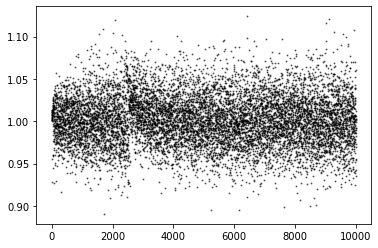

In [51]:
def ex_8_plot():
    plt.figure(8)
    plt.scatter(*zip(*ex_8), alpha=0.5,s =1, c="k")
#     plt.scatter(*zip(*(ex_8_mincount)), alpha=0.5, c="r", s=1)
    plt.show()

ex_8_plot()